In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

C:\Users\rodoh\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [51]:
enddate = date.datetime(2020,4,29)
startdate = date.datetime(2019,4,1)
tick = 'ELEKTRA.MX'
data = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [45]:
pd.set_option('display.max_rows',None)

In [52]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-01,1057.380005,1038.079956,1054.900024,1049.560059,97713.0,1041.492432
2019-04-02,1069.500000,1041.439941,1048.000000,1050.790039,65465.0,1042.713013
2019-04-03,1061.729980,1045.410034,1050.800049,1049.609985,76875.0,1041.541992
2019-04-04,1056.900024,1041.500000,1054.989990,1053.189941,67832.0,1045.094482
2019-04-05,1055.709961,1041.000000,1048.199951,1044.260010,20431.0,1036.233154


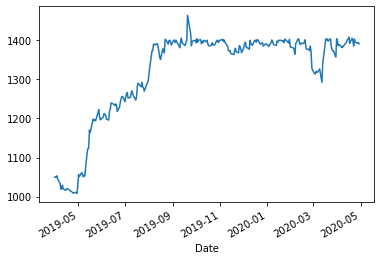

In [53]:
%matplotlib inline
data.Close.plot()

# Oscilador Estocastico

In [6]:
def STO(df, nK, nD, nS=1):
    SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min())/(df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SOk'+str(nK) )
    SOd = pd.Series(SOk.ewm(ignore_na = False, span = nD, min_periods = nD -1, adjust = True).mean(), name = 'SOd'+str(nD))
    SOk = SOk.ewm(ignore_na = False, span = nS, min_periods = nS - 1 , adjust = True).mean()
    SOd = SOd.ewm(ignore_na = False, span = nS, min_periods = nS - 1 , adjust = True).mean()
    df = df.join(SOk)
    df = df.join(SOd)
    df['Recomendacion'] = 0
    df.loc[(((SOk < SOd) & (SOk.shift(1) > SOd.shift(1))) & (SOd > 0.8)),'Recomendacion'] = 'Vender'
    df.loc[(((SOk > SOd) & (SOk.shift(1) < SOd.shift(1))) & (SOd < 0.2)),'Recomendacion'] = 'Comprar'
    df.loc[ df['Recomendacion'] == 0, 'Recomendacion'] = '-'

    return df

In [54]:
df2 = STO(data, 14, 3)

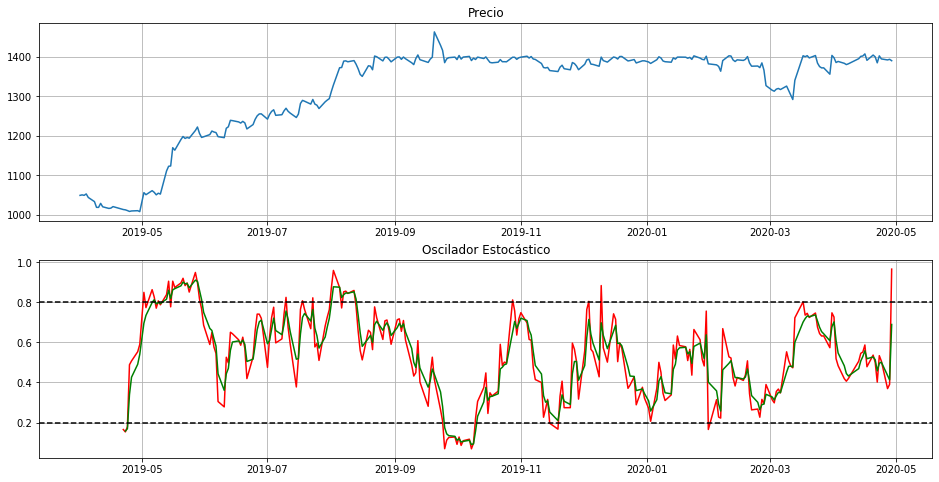

In [55]:
fig = plt.figure(figsize = (16,8))
ax1 = plt.subplot(211)
plt.plot(df2.Close)
plt.grid(True)
plt.title('Precio')
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(df2.SOk14, color = 'r')
plt.plot(df2.SOd3, color = 'g')
plt.axhline(y=0.8, color = 'k', linestyle = '--')
plt.axhline(y=0.2, color = 'k', linestyle = '--')
plt.title('Oscilador Estocástico')
plt.grid(True)
plt.show()

In [56]:
df2[['Close', 'Recomendacion']]

,Close,Recomendacion
Date,,
2019-04-01,1049.560059,-
2019-04-02,1050.790039,-
2019-04-03,1049.609985,-
2019-04-04,1053.189941,-
2019-04-05,1044.260010,-
2019-04-08,1033.780029,-
2019-04-09,1019.210022,-
2019-04-10,1019.090027,-
2019-04-11,1029.319946,-
